<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 5

## Q1: Distribution of power spectral estimates

<div style='background:#F0F0F0'>**1** You **may** use `matplotlib.mlab.psd` for the following question, but you had best use it correctly!

Using normally distributed random noise time series of length $N=2048$, show using a Monte Carlo analysis and by comparison to the theoretical probability distribution functions that:  
</div>

   1. The raw spectral estimate is indeed distributed as $\chi^2_2$.
   2. Show that block averaging with no overlap is distributed as $\chi^2_{2N_{blocks}}$.
   3. Show that block averaging with 50% overlap Hanning windows is distributed as $\chi^2_{2N_{blocks}}$.

<div style='background:#F0F0F0'>You can choose your block length, but making it an integer divisor of 2048 will make your life a lot easier.  Show that as $N_{blocks}$ is increased the variance drops (i.e. the distribution of the spectral estimates gets tighter).</div>


<div style='background:#F0F0F0'>HINT: for this time series the individual frequency estimates are indipendent samples of the distribution, so you can use them in compiling your distributions.</div>

<div style='background:#F0F0F0'>HINT: To get the pdf of the $\chi^2_\nu$ distribution correct, you need to "scale" by $\nu^{-1}$ where $\nu$ are the degrees of freedom.</div>

<div style='background:#F0F0F0'>HINT: for good presentation, make your histograms have the same bin sizes, and compare the distributions for all three cases on the same plot.</div>

In [1]:
import numpy.random as random
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib nbagg

C:\Users\ldanyluk\Anaconda\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


<IPython.core.display.Javascript object>


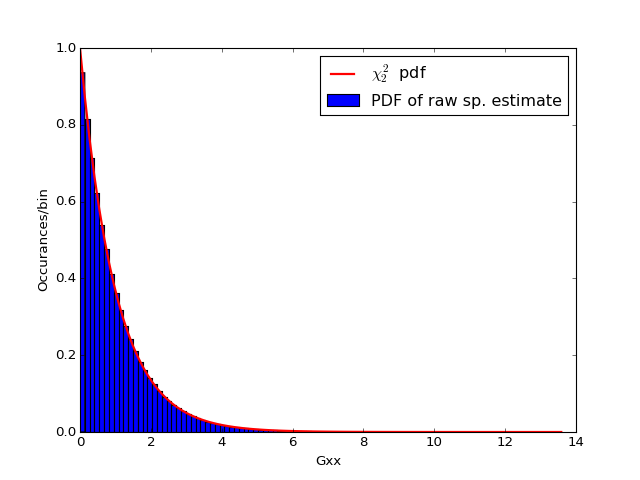

In [2]:
# make Monte Carlo

N=2048
T=2048
dt=T/N
t=np.arange(0,T,dt)
f=np.arange(N/2.)/T
mcx=np.zeros((1000,N))
Graw=np.zeros((1000, N/2))
for i in range(1000):
    x=np.random.randn(N)
    mcx[i,:]=x
    Xraw=dt*np.fft.fft(x)
    Graw[i,:]=(2.0/T)*np.real(np.conj(Xraw[:N/2])*Xraw[:N/2])/2.
    
Grflat=Graw.flat
    
fig, ax=plt.subplots(1,1)

nn,bins, patches= ax.hist(Grflat,100, normed=True, label='PDF of raw sp. estimate')
chi= stats.chi2.pdf(bins, df=2, scale=1./2)
ax.plot(bins, chi, color= 'r' ,linewidth=2, label='$\chi^2_2$ pdf')
ax.legend(loc=0)
ax.set_xlabel('Gxx')
ax.set_ylabel('Occurances/bin')

<IPython.core.display.Javascript object>


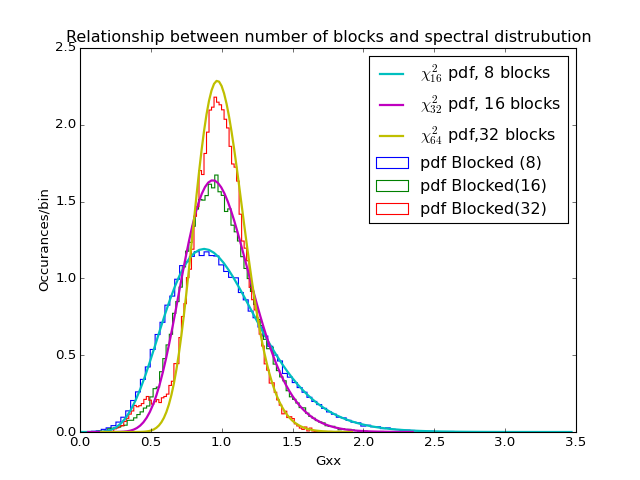

In [11]:
bpsd=np.zeros((1000,129))
numBlocks=8
for i in range(1000):
    x=mcx[i,:]
    b,f=mlab.psd(x,NFFT=N/numBlocks, Fs=1, window=mlab.window_none, noverlap=None)
    b=b/2
    bpsd[i]=b
    
bspdflat=bpsd.flat
dof=2*numBlocks

bpsd2=np.zeros((1000,65))
numBlocks2=16
for i in range(1000):
    x=mcx[i,:]
    b,f=mlab.psd(x,NFFT=N/numBlocks2, Fs=1, window=mlab.window_none, noverlap=None)
    b=b/2
    bpsd2[i]=b
    
bspdflat2=bpsd2.flat
dof2=2*numBlocks2

bpsd3=np.zeros((1000,33))
numBlocks3=32
for i in range(1000):
    x=mcx[i,:]
    b,f=mlab.psd(x,NFFT=N/numBlocks3, Fs=1, window=mlab.window_none, noverlap=None)
    b=b/2
    bpsd3[i]=b
    
bspdflat3=bpsd3.flat
dof3=2*numBlocks3


fig, ax=plt.subplots(1,1)
nn,bins1, patches= ax.hist(bspdflat,100, normed=True, label='pdf Blocked (8)', histtype='step')
chi1=stats.chi2.pdf(bins1, df=dof, scale=1./dof)
nn2,bins2, patches= ax.hist(bspdflat2,100, normed=True, label='pdf Blocked(16)', histtype='step')
chi2=stats.chi2.pdf(bins2, df=dof2, scale=1./dof2)
nn3,bins3, patches= ax.hist(bspdflat3,100, normed=True, label='pdf Blocked(32)', histtype='step')
chi3=stats.chi2.pdf(bins3, df=dof3, scale=1./dof3)
ax.plot(bins1, chi1, linewidth=2, label='$\chi^2_{16}$ pdf, 8 blocks')
ax.plot(bins2, chi2, linewidth=2, label='$\chi^2_{32}$ pdf, 16 blocks')
ax.plot(bins3, chi3, linewidth=2, label='$\chi^2_{64}$ pdf,32 blocks')
ax.legend(loc=0)
ax.set_xlabel('Gxx')
ax.set_ylabel('Occurances/bin')
ax.set_title('Relationship between number of blocks and spectral distrubution')

The spectral distribution does tighten up as the number of blocks increase. Note, there are some points on the left that diverge from the theoretical plots of $\chi^2_{2N_{blocks}}$ , especially noticeable in the red line the pdf with 32 blocks. 

<IPython.core.display.Javascript object>


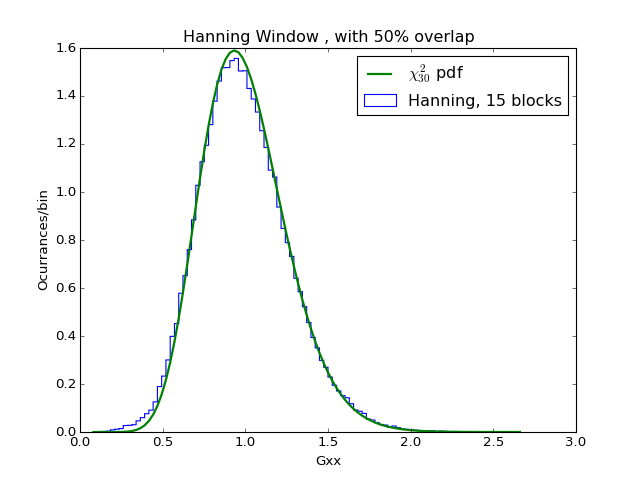

In [18]:
# now try the Hanning  with overlap of %50
bhan=np.zeros((1000,129))
numB=15
#50% of N/8=256 is 128. Then for bocks of 128, we get 15 of them for 50% overlap
for i in range(1000):
    x=mcx[i,:]
    b,f=mlab.psd(x,NFFT=N/numBlocks, Fs=1, window=mlab.window_hanning, noverlap=128)
    b=b/2
    bhan[i]=b
    
bhanflat=bhan.flat
dofh=2*numB
fig, ax=plt.subplots(1,1)
nn,binsh, patches= ax.hist(bhanflat,100, normed=True, label='Hanning, 15 blocks', histtype='step')
chih=stats.chi2.pdf(binsh, df=dofh, scale=1./dofh)
ax.plot(binsh, chih, linewidth=2, label='$\chi^2_{30}$ pdf')
ax.legend(loc=0)
ax.set_xlabel('Gxx')
ax.set_ylabel('Ocurrances/bin')
ax.set_title('Hanning Window , with 50% overlap')

Now try plotting them on the same graph, to see them together


<IPython.core.display.Javascript object>


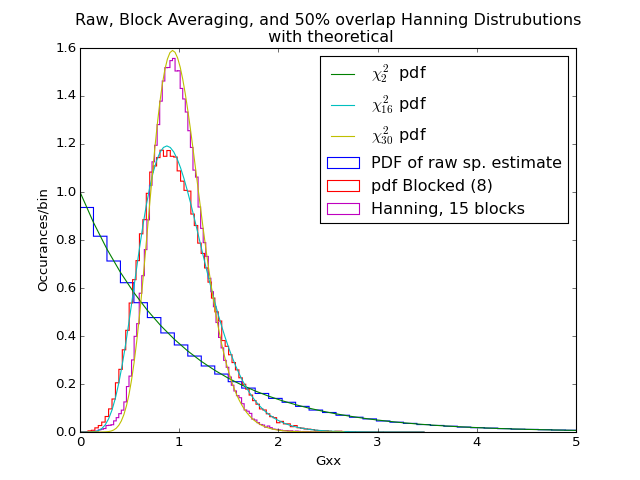

101


(0, 5)

In [12]:
print 'Now try plotting them on the same graph, to see them together'
fig, ax=plt.subplots(1,1)
nn,bins, patches= ax.hist(Grflat,100, normed=True, label='PDF of raw sp. estimate', histtype='step')
print len(bins)

chi= stats.chi2.pdf(bins, df=2, scale=1./2)
ax.plot(bins, chi,linewidth=1, label='$\chi^2_2$ pdf')

nn,bins1, patches= ax.hist(bspdflat,100, normed=True, label='pdf Blocked (8)', histtype='step')
chi1=stats.chi2.pdf(bins1, df=dof, scale=1./dof)
ax.plot(bins1, chi1, linewidth=1, label='$\chi^2_{16}$ pdf')

nn,binsh, patches= ax.hist(bhanflat,100, normed=True, label='Hanning, 15 blocks', histtype='step')
chih=stats.chi2.pdf(binsh, df=dofh, scale=1./dofh)
ax.plot(binsh, chih, linewidth=1, label='$\chi^2_{30}$ pdf')

ax.set_title('Raw, Block Averaging, and 50% overlap Hanning Distrubutions \n with theoretical')
ax.legend(loc=0)
ax.set_xlabel('Gxx')
ax.set_ylabel('Occurances/bin')
ax.set_xlim((0,5))

The different methods all compared quite well to their theoretical distributions of $\chi^2_{2N_{blocks}}$

<div style='background:#F0F0F0'>**2**  For the Hanning window estimate, what fits better: $2N_{blocks}$ degrees of freedom or $18N_{blocks}/11$ degrees of freedom (the correct theoretical value)?  Its OK to evaluate by eye.</div>

<IPython.core.display.Javascript object>


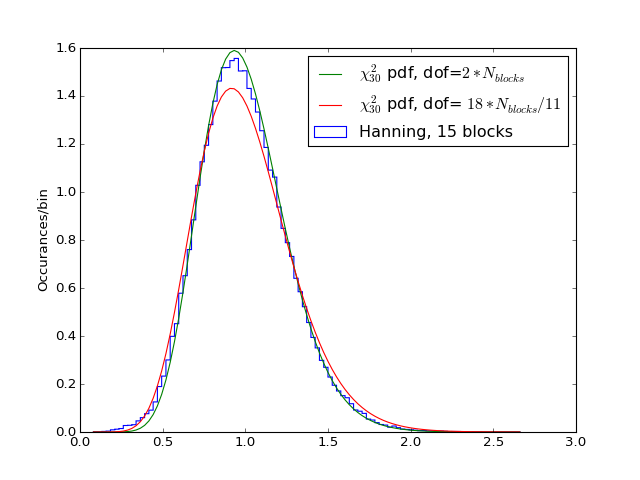

In [22]:
newdof=18*numB/11
fig, ax=plt.subplots(1,1)
nn,binsh, patches= ax.hist(bhanflat,100, normed=True, label='Hanning, 15 blocks', histtype='step')
chih=stats.chi2.pdf(binsh, df=dofh, scale=1./dofh)
newChi=stats.chi2.pdf(binsh, df=newdof, scale=1./newdof)
ax.plot(binsh, chih, linewidth=1, label='$\chi^2_{30}$ pdf, dof=$2*N_{blocks}$')
ax.plot(binsh, newChi, linewidth=1, label='$\chi^2_{30}$ pdf, dof= $18*N_{blocks}/11$')
ax.legend(loc=0)
ax.set_ylabel('Occurances/bin')
ax.set_label('Gxx')

they both fit pretty well.The red line for the correct theoretical value, dof=$18N_{blocks}/11$ is a bit wider and shorter than the estimate of the distrubution, yet the other is a bit taller, though along the sides it is a better fit.  

## Q2: Spectra of a "red-noise" signal

<div style='background:#F0F0F0'> **1** Load in the Deep Cove hourly data, and compute the power spectra using some reasonable value for $N_{FFT}$, and comment on the effect of applying the Hanning window to not applying it to the spectral leakage.</div>

In [7]:
hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[[6,28],2:]
dc = hourdata[0,:]
dc=dc[np.isfinite(dc)]

24357


C:\Users\ldanyluk\Anaconda\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


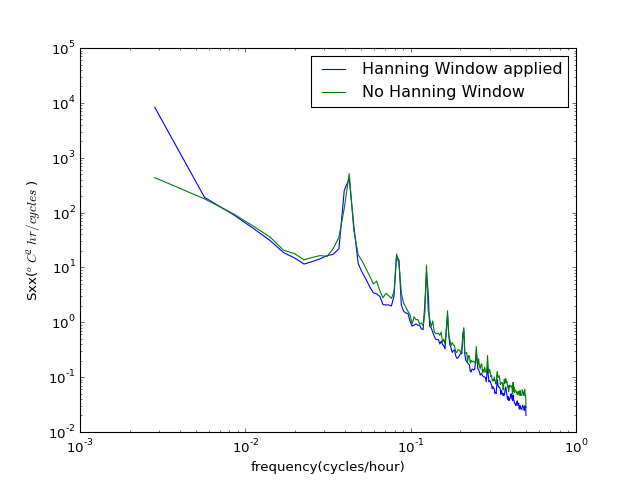

In [26]:
print len(dc)
dc= dc[~np.isnan(dc)]
# now try the Hanning  
numB=len(dc)/353
bh,fh=mlab.psd(dc,NFFT=353, Fs=1, window=mlab.window_hanning, noverlap=176)
bh=bh/2
b,f=mlab.psd(dc,NFFT=353, Fs=1, window=mlab.window_none, noverlap=0)
b=b/2

    
fig, ax=plt.subplots(1,1)
ax.loglog(fh, bh, label='Hanning Window applied')
ax.loglog(f, b, label='No Hanning Window')
ax.legend(loc=0)
ax.set_xlabel('frequency(cycles/hour)')
ax.set_ylabel('Sxx($^oC^2 hr/cycles$ )')

The power spectra with the Hanning window does match up pretty well with the one with no Hanning window,
but they do deviate more significantly at low frequencies. 
This could be because the Hanning window reduces the importance of some of the data- by losing data at the edges. It was also said in the notes that the overlapped Hanning estimates have 25% more vairence that the unoverlapped unwindowed estimates. 

<div style='background:#F0F0F0'> **2** Now do the same thing to the intergal of the Deep Cove data with time: $$y(t)=\int_o^t x(t')\ \mathrm{d}t'$$  This is obviously a silly thing to do, but compare the spectra and comment on the difference between the Hanning window and the non-Hanning windowed data.  </div>

<IPython.core.display.Javascript object>


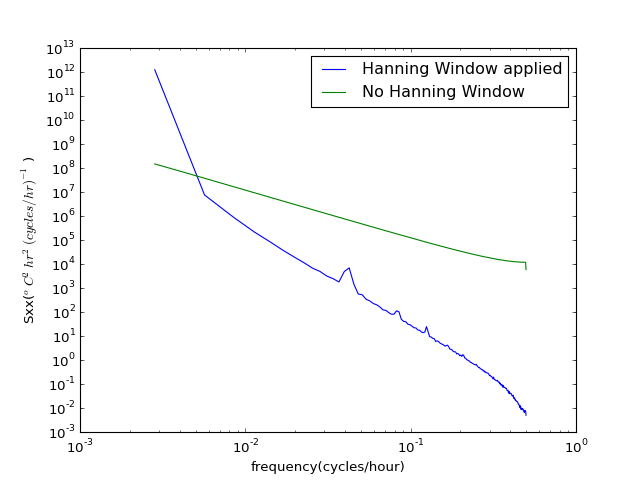

In [28]:
sm=np.sum(dc)
t=np.arange(0, len(dc),1.0)
y=np.zeros(len(dc))
for i in range(len(dc)):
    dcp=dc[0:i:]
    y[i]=np.sum(dcp)*1.

numB=len(y)/353

ybh,yfh=mlab.psd(y,NFFT=353, Fs=1, window=mlab.window_hanning, noverlap=176)
ybh=ybh/2
yb,yf=mlab.psd(y,NFFT=353, Fs=1, window=mlab.window_none, noverlap=None)
yb=yb/2

    
fig, ax=plt.subplots(1,1)
ax.loglog(yfh, ybh, label='Hanning Window applied')
ax.loglog(yf, yb, label='No Hanning Window')
ax.legend(loc=0)
ax.set_xlabel('frequency(cycles/hour)')
ax.set_ylabel('Sxx($^oC^2 hr^2(cycles/hr)^{-1}$ )')

In this case, there is a much larger difference between implementing the hanning window and not. Why would this be? (Does the integral act much differently than the dc data itself? yes, quite differently, as can be seen below) At about every year there is a repeat of a sloped shape- this could be what this one peak is. But Why is there such a difference in the values of Sxx? 
The blue Hanning one is the correct power series though. 
When the hanning window is done, it takes care of the leakage, and needs many more lower frequency sine waves to fit to the data. Without, it assumes that the data is periodic, but cuts things off. 

try plotting y, to see the patterns


<IPython.core.display.Javascript object>


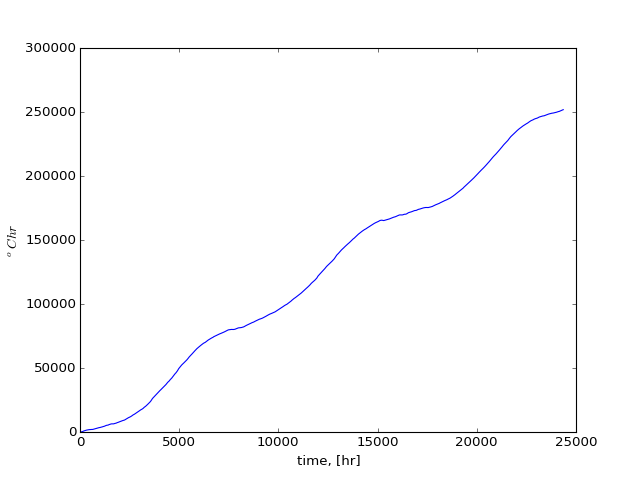

In [27]:
print 'try plotting y, to see the patterns'
fig, ax=plt.subplots(1,1)
ax.plot(t,y)
ax.set_xlabel('time, [hr]')
ax.set_ylabel('$^oC hr$')